# Créer une carte (polygones) à partir d'un fichier CSV

## Objectifs et contexte

Ce notebook montre comment **représenter sur une carte des données linguistiques sous forme de polygones**, avec Python 3, à partir d'un fichier CSV ou TSV.

Il fait partie du projet [***cartographie_linguistique_Python***](https://gitlab.com/tekipaki-blog/cartographie_linguistique_python), qui comporte déjà les notebooks/articles suivants :

* ***Créer une carte (points) à partir d'un fichier CSV*** ([article sur Tekipaki](https://tekipaki.hypotheses.org/1225), [notebook](https://gitlab.com/tekipaki-blog/cartographie_linguistique_python/-/blob/master/Tekipaki_Cartographie_Python_1_CSV-et-points.ipynb))
* ***Contrôler l'affichage des couches de données*** ([article sur Tekipaki](https://tekipaki.hypotheses.org/1362), [notebook](https://gitlab.com/tekipaki-blog/cartographie_linguistique_python/-/blob/master/Tekipaki_Cartographie_Python_2_layer-control.ipynb))

Les contenus du notebook sont suffisants pour comprendre comment produire une carte. **Je vous conseille toutefois de lire l'article [*Cartographier des données linguistiques avec Python - 3*](https://tekipaki.hypotheses.org/?p=1414), sur mon carnet Hypothèses [*Tekipaki*](https://tekipaki.hypotheses.org/)** si vous souhaitez comprendre plus finement le code présenté ici et l'adapter facilement à vos propres projets.

Les données du fichier d'entrée (`hmon1336.tsv`) sont issues de la page [Family: Hmong-Mien](https://glottolog.org/resource/languoid/id/hmon1336) de [Glottolog](https://glottolog.org) (*Glottolog 4.3* par Hammarström, Harald & Forkel, Robert & Haspelmath, Martin & Bank, Sebastian sous licence [Creative Commons Attribution 4.0 International License](https://creativecommons.org/licenses/by/4.0/)).

## Création de la carte

### Imports

In [1]:
import csv
import folium
from shapely.geometry import Polygon

### Fond de carte

Options à adapter selon les données à représenter ([explications](https://tekipaki.hypotheses.org/1225)).

In [2]:
ma_carte = folium.Map(location=[25.6618, 108.533], zoom_start=5, tiles='openstreetmap')

In [3]:
ma_carte

### Ajout des données

**Lecture des données du fichier d'entrée**

In [4]:
input_path = 'hmon1336.tsv'

La classe `shapely.geometry.Polygon()` ([documentation](https://shapely.readthedocs.io/en/stable/manual.html)) prend en paramètre une liste de tuples correspondant aux coordonnées des points à partir desquels tracer le polygone.

J'utilise ici le module `csv`, [dont j'ai déjà expliqué le fonctionnement](https://tekipaki.hypotheses.org/64), pour lire les données du fichier d'entrée. Grâce à la [compréhension de liste](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions), une ligne de code suffit à instancier un objet `Polygon()` qui reçoit en paramètre une liste comprenant toutes les paires de coordonnées du fichier d'entrée. Chaque paire de coordonnées est un tuple.

In [5]:
with open(input_path, 'r', encoding='utf-8') as tableau:
    lecteur = csv.DictReader(tableau, delimiter='\t')
    hmon1336_contour = Polygon([(float(ligne['Longitude']), float(ligne['Latitude'])) for ligne in lecteur])

**Correction du tracé du polygone**

Aperçu du polygone correspondant à l'instance de `Polygon()` déclarée plus haut :

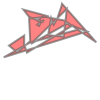

In [6]:
hmon1336_contour

Il ne peut pas être ajouté à la carte tel quel. Création d'un polygone convexe avec `convex_hull` :

In [7]:
hmon1336_ch = hmon1336_contour.convex_hull

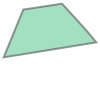

In [8]:
hmon1336_ch

Le polygone est maintenant bien formé. J'ai choisi d'utiliser une instance de `folium.GeoJson()` ([documentation](https://python-visualization.github.io/folium/quickstart.html#GeoJSON/TopoJSON-Overlays)) pour l'ajouter à la carte. 

**Attention :** Ne pas oublier de nommer la couche de données en renseignant l'attribut `name`, sinon elle ne sera pas prise en compte pour le *layer control*.

In [9]:
folium.GeoJson(
    hmon1336_ch,
    name='Hmong-Mien (surface)',
    tooltip='Langues hmong-mien',
    style_function=lambda x: {
        'fillColor': 'blue',
        'color': 'blue',
        'weight': 1,
        'fillOpacity': 0.4
    }
).add_to(ma_carte)

In [10]:
ma_carte

Layer control ([explications](https://tekipaki.hypotheses.org/1362)) avec paramètres par défaut :

In [11]:
folium.LayerControl().add_to(ma_carte)

In [12]:
ma_carte

## Export de la carte dans un fichier HTML

In [13]:
ma_carte.save('carte_hmong-mien_polygone.html')